# Data Scraping

## Import Library

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [4]:
from google_play_scraper import app, reviews_all, Sort, reviews

## Scrap The Data

Data yang akan digunakan adalah data ulasan playstore pada aplikasi "brimo" atau bri mobile. Ada 60 ribu data yang akan digunakan yang disortir berdasarkan ulasan terbaru pada aplikasi brimo.

In [5]:
scrapreview, _ = reviews(
    'id.co.bri.brimo',
    lang='id',
    country = 'id',
    sort=Sort.NEWEST,
    count = 60000
)

### Simpan dalam Format .csv

In [6]:
# Loading Dataset
ulasan_df = pd.DataFrame(scrapreview)
ulasan_df.to_csv('ulasan_aplikasi.csv', index=False)

# EDA

In [7]:
jumlah_ulasan, jumlah_kolom = ulasan_df.shape
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 60000
Jumlah kolom: 11


In [8]:
ulasan_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cda3d1b5-3df5-4cb4-a7dc-820817f771b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya suka,5,0,2.78.0,2025-03-02 21:18:57,Terima kasih sudah menggunakan aplikasi BRImo ...,2025-03-03 03:13:41,2.78.0
1,37e61bab-ccc1-4030-ab1f-64a313ae4a36,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mempermydah tiap trransaksi,kami",4,0,2.78.0,2025-03-02 20:53:40,"Hai Sobat BRI, terima kasih atas ulasannya. Ni...",2025-03-03 03:14:13,2.78.0
2,d3ec47e6-64f4-4874-a545-153063cf9fdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cepat dan mudah,5,0,2.78.0,2025-03-02 20:50:10,Terima kasih sudah menggunakan aplikasi BRImo ...,2025-03-03 04:56:04,2.78.0
3,7dac5ac7-98d8-4dcb-9d32-69dd409e4372,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantaf brimo,5,0,2.78.0,2025-03-02 20:47:09,Terima kasih sudah menggunakan aplikasi BRImo ...,2025-03-03 03:13:54,2.78.0
4,005cc7c7-2da5-4565-8604-836453c2cd80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah. banyak hal menjadi mudah pakai ...,5,0,2.78.0,2025-03-02 20:36:47,Terima kasih sudah menggunakan aplikasi BRImo ...,2025-03-03 04:00:55,2.78.0


In [9]:
ulasan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              60000 non-null  object        
 1   userName              60000 non-null  object        
 2   userImage             60000 non-null  object        
 3   content               60000 non-null  object        
 4   score                 60000 non-null  int64         
 5   thumbsUpCount         60000 non-null  int64         
 6   reviewCreatedVersion  49377 non-null  object        
 7   at                    60000 non-null  datetime64[ns]
 8   replyContent          59984 non-null  object        
 9   repliedAt             59984 non-null  datetime64[ns]
 10  appVersion            49377 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.0+ MB


### Drop Kolom dengan Null

In [10]:
# cek null
ulasan_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,10623
at,0
replyContent,16
repliedAt,16


In [11]:
# Pada kolom reviewCreatedVersion dan appVersion
# Jumlah baris yang null cukup banyak, maka drop kolom tersebut
clean_df_column = ulasan_df.drop(['reviewCreatedVersion', 'appVersion', 'replyContent', 'repliedAt'], axis=1)

In [12]:
# cek null
clean_df_column.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
at,0


### Drop Baris dengan Nilai Null

In [13]:
# Drop baris
clean_df = clean_df_column.dropna()

In [14]:
# cek null
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
at,0


### Cek Duplikat

In [15]:
clean_df.duplicated().sum()

0

In [16]:
jumlah_ulasan, jumlah_kolom = clean_df.shape
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 60000
Jumlah kolom: 7


# Text Preprocessing

## Import Library

In [17]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Buat Fungsi Preprocessing

In [18]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update([
    'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa',
    'loh', 'kah', 'woi', 'woii', 'woy', 'dong', 'nih', 'tuh', 'deh', 'lah',
    'kok', 'gue', 'elo', 'lu', 'loe', 'lho', 'cuy', 'bro', 'sis', 'sama',
    'banget', 'abis', 'kan', 'nih', 'tadi', 'udah', 'belom', 'emang', 'eh',
    'mah', 'si', 'makanya', 'gitu', 'gimana', 'begitu', 'yak', 'oke', 'yuk'
    ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [19]:
# Ganti slangwords dengan kata sebenarnya
slangwords =  {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih",
              "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "yg": "yang", "gpp": "gak apa-apa", "tp": "tapi", "jd": "jadi",
              "krn": "karena", "dmn": "dimana", "gmn": "gimana", "tdk": "tidak",
              "blm": "belum", "sdh": "sudah", "trs": "terus", "sm": "sama",
              "dlm": "dalam", "dkt": "dekat", "sbnr": "sebenarnya", "hrs": "harus",
              "udh": "sudah", "blg": "bilang", "bkn": "bukan", "brp": "berapa",
              "dr": "dari", "dgn": "dengan", "jg": "juga", "skrg": "sekarang",
              "td": "tadi", "sy": "saya", "gw": "saya", "lo": "kamu", "trs": "terus",
              "kpn": "kapan"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

### Lakukan Text Processing pada Dataset

In [20]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

In [21]:
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

In [22]:
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

In [23]:
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

In [24]:
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

In [25]:
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [26]:
# Cek dataset
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,cda3d1b5-3df5-4cb4-a7dc-820817f771b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya suka,5,0,2025-03-02 21:18:57,Saya suka,saya suka,saya suka,"[saya, suka]",[suka],suka
1,37e61bab-ccc1-4030-ab1f-64a313ae4a36,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mempermydah tiap trransaksi,kami",4,0,2025-03-02 20:53:40,Mempermydah tiap trransaksikami,mempermydah tiap trransaksikami,mempermydah tiap trransaksikami,"[mempermydah, tiap, trransaksikami]","[mempermydah, trransaksikami]",mempermydah trransaksikami
2,d3ec47e6-64f4-4874-a545-153063cf9fdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cepat dan mudah,5,0,2025-03-02 20:50:10,Cepat dan mudah,cepat dan mudah,cepat dan mudah,"[cepat, dan, mudah]","[cepat, mudah]",cepat mudah
3,7dac5ac7-98d8-4dcb-9d32-69dd409e4372,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantaf brimo,5,0,2025-03-02 20:47:09,Mantaf brimo,mantaf brimo,mantaf brimo,"[mantaf, brimo]","[mantaf, brimo]",mantaf brimo
4,005cc7c7-2da5-4565-8604-836453c2cd80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah. banyak hal menjadi mudah pakai ...,5,0,2025-03-02 20:36:47,Alhamdulillah banyak hal menjadi mudah pakai b...,alhamdulillah banyak hal menjadi mudah pakai b...,alhamdulillah banyak hal menjadi mudah pakai b...,"[alhamdulillah, banyak, hal, menjadi, mudah, p...","[alhamdulillah, mudah, pakai, brimo]",alhamdulillah mudah pakai brimo


# Pelabelan Dataset

## Berikan Nilai Pada Setiap Ulasan  

In [27]:
import requests
from io import StringIO
import csv

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')  # Use tab as delimiter
    next(reader)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter='\t')  # Use tab as delimiter
    next(reader)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

## Polaritas Ulasan

In [28]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # Jika skor sentimen 0, maka polaritas adalah netral
    return score, polarity

In [29]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    28749
neutral     16167
negative    15084
Name: count, dtype: int64


In [30]:
clean_df[['polarity_score', 'polarity']].head()

,polarity_score,polarity
0,2,positive
1,0,neutral
2,3,positive
3,0,neutral
4,8,positive


In [31]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,cda3d1b5-3df5-4cb4-a7dc-820817f771b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya suka,5,0,2025-03-02 21:18:57,Saya suka,saya suka,saya suka,"[saya, suka]",[suka],suka,2,positive
1,37e61bab-ccc1-4030-ab1f-64a313ae4a36,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mempermydah tiap trransaksi,kami",4,0,2025-03-02 20:53:40,Mempermydah tiap trransaksikami,mempermydah tiap trransaksikami,mempermydah tiap trransaksikami,"[mempermydah, tiap, trransaksikami]","[mempermydah, trransaksikami]",mempermydah trransaksikami,0,neutral
2,d3ec47e6-64f4-4874-a545-153063cf9fdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cepat dan mudah,5,0,2025-03-02 20:50:10,Cepat dan mudah,cepat dan mudah,cepat dan mudah,"[cepat, dan, mudah]","[cepat, mudah]",cepat mudah,3,positive
3,7dac5ac7-98d8-4dcb-9d32-69dd409e4372,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantaf brimo,5,0,2025-03-02 20:47:09,Mantaf brimo,mantaf brimo,mantaf brimo,"[mantaf, brimo]","[mantaf, brimo]",mantaf brimo,0,neutral
4,005cc7c7-2da5-4565-8604-836453c2cd80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah. banyak hal menjadi mudah pakai ...,5,0,2025-03-02 20:36:47,Alhamdulillah banyak hal menjadi mudah pakai b...,alhamdulillah banyak hal menjadi mudah pakai b...,alhamdulillah banyak hal menjadi mudah pakai b...,"[alhamdulillah, banyak, hal, menjadi, mudah, p...","[alhamdulillah, mudah, pakai, brimo]",alhamdulillah mudah pakai brimo,8,positive


## Visualisasi Polarity Pie Chart

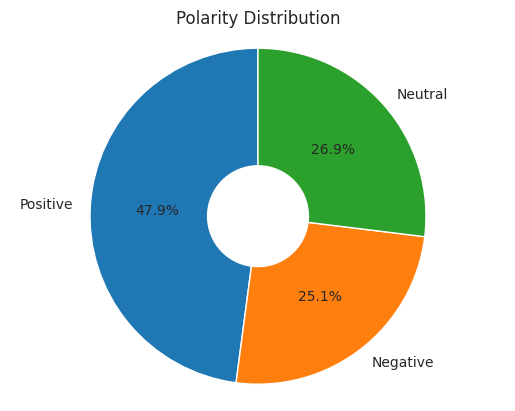

In [32]:
# pie cart polarity
labels = ['Positive', 'Negative', 'Neutral']
sizes = [clean_df['polarity'].value_counts()['positive'], clean_df['polarity'].value_counts()['negative'], clean_df['polarity'].value_counts()['neutral']]
sns.set_style("whitegrid")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
plt.title("Polarity Distribution")
plt.gca().add_artist(center_circle)
plt.axis('equal')
plt.show()

## Mengatasi Unbalanced Data dengan Undersampling

In [33]:
# Hitung jumlah data positive sebelum undersampling
positive_count = clean_df["polarity"].value_counts()["positive"]
remove_count = int(0.35 * positive_count)
positive_indices = clean_df[clean_df["polarity"] == "positive"].sample(n=remove_count, random_state=42).index
undersampled_df = clean_df.drop(index=positive_indices)
print(undersampled_df["polarity"].value_counts(normalize=True) * 100)

polarity
positive    37.420401
neutral     32.374144
negative    30.205455
Name: proportion, dtype: float64


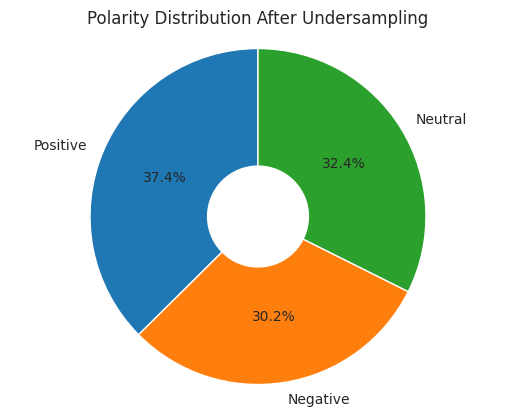

In [34]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [undersampled_df['polarity'].value_counts()['positive'], undersampled_df['polarity'].value_counts()['negative'], undersampled_df['polarity'].value_counts()['neutral']]
sns.set_style("whitegrid")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
plt.title("Polarity Distribution After Undersampling")
plt.gca().add_artist(center_circle)
plt.axis('equal')
plt.show()

## WordCloud

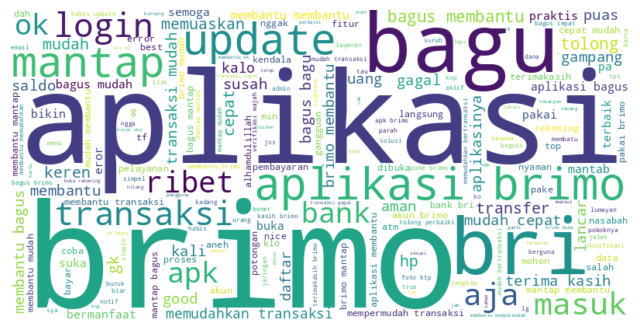

In [35]:
# Visualisasi wordCloud
# ALL
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua teks ulasan yang telah diproses
all_text = " ".join(undersampled_df['text_akhir'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

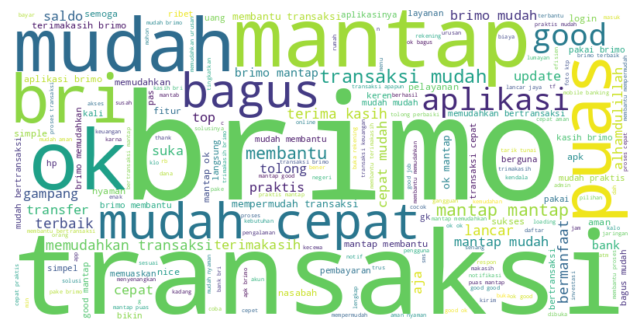

In [36]:
# POSITIVE WORDS
positive_text = " ".join(undersampled_df[undersampled_df['polarity'] == "positive"]['text_akhir'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

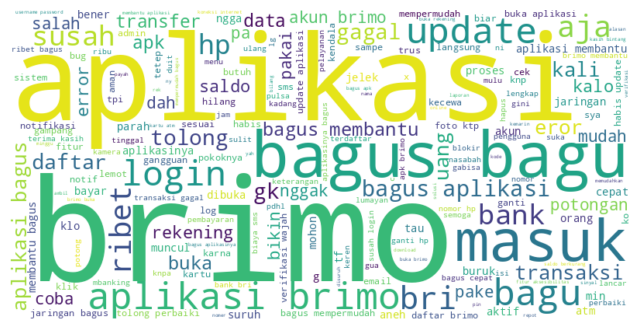

In [37]:
# NEGATIVE WORDS
negative_text = " ".join(undersampled_df[undersampled_df['polarity'] == "negative"]['text_akhir'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

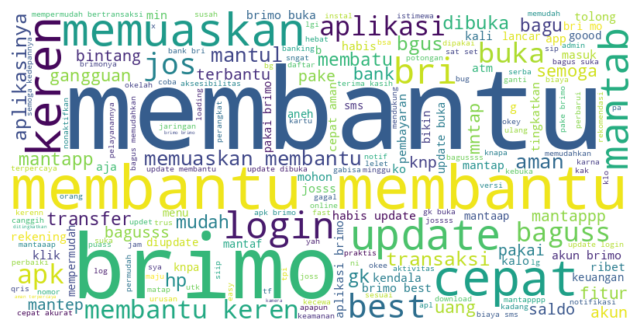

In [38]:
# NEUTRAL WORDS
neutral_text = " ".join(undersampled_df[undersampled_df['polarity'] == "neutral"]['text_akhir'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Splitting dan Ekstraksi Fitur (TF-IDF)

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan data ulasan dan label (polarity)
X = undersampled_df['text_akhir']
y = undersampled_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,aja,akses,aksesibilitas,aktif,akun,alhamdulillah,aman,aneh,apapun,...,tunai,uang,ulang,update,urusan,username,verifikasi,versi,wajah,wifi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.656333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49934,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49935,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49936,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
 # Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Modeling

Ada 4 Percobaan yang akan dilakukan menggunakan beberapa algoritma klasifikasi. Ada 4 algoritma yang akan digunakan untuk melakukan klasifikasi pada teks yang sudah diberikan nilai dengan metode TF IDF yaitu naive bayes, decision tree, random forest, dan logistic regression.

## Naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
print('Naive Bayes - Akurasi Training:', accuracy_train_nb)
print('Naive Bayes - Akurasi Testing:', accuracy_test_nb)

Naive Bayes - Akurasi Training: 0.8541176470588235
Naive Bayes - Akurasi Testing: 0.8540248297957549


## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())
# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)
# Menampilkan akurasi
print('Decision Tree - Akurasi Training:', accuracy_train_dt)
print('Decision Tree - Akurasi Testing:', accuracy_test_dt)

Decision Tree - Akurasi Training: 0.9604255319148937
Decision Tree - Akurasi Testing: 0.882058470164197


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
print('Random Forest - Akurasi Training:', accuracy_train_rf)
print('Random Forest - Akurasi Testing:', accuracy_test_rf)

Random Forest - Akurasi Training: 0.9604255319148937
Random Forest - Akurasi Testing: 0.9009811774128955


## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())
# Evauasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)
print('Logistic Regression - Akurasi Training:', accuracy_train_lr)
print('Logistic Regression - Akurasi Testing:', accuracy_test_lr)

Logistic Regression - Akurasi Training: 0.9080100125156445
Logistic Regression - Akurasi Testing: 0.9064877853424109


**Insight :**
- Percobaan 1 menggunakan algoritma naive bayes menghasilkan akurasi training sebesar 86% dan akurasi testing sebesar 85%
- Percobaan 2 menggunakan algoritma decision tree menghasilkan akurasi training sebesar 96% dan akurasi testing sebesar 87%
- Percobaan 3 menggunakan algoritma random forest menghasilkan akurasi training sebesar 96% dan akurasi testing sebesar 90%
- Percobaan 4 menggunakan algoritma logistic regression menghasilkan akurasi training sebesar 91% dan akurasi testing sebesar 90%
- Dari percobaan-percobaan yang telah dilakukan, dapat disimpulkan bahwa model terbaik diraih dengan menggunakan random forest dengan akurasi training mencapai 96% dan akurasi testing sebesar 90%. Disusul dengan logistic regression, decision tree, dan naive bayes.

# Inference/ Testing dengan Data Baru

In [189]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [206]:
teks_inferensi = [
    "Aplikasinya sering error dan susah diakses saat dibutuhkan, Login selalu gagal meskipun saya sudah memasukkan data dengan benar.",
    "Kualitasnya buruk dan tidak sesuai harapan, aplikasi tiba-tiba logout sendiri tanpa alasan yang jelas",
    "Sangat puas dengan produk ini, rekomendasi banget!",
    "Pengiriman sangat cepat dan produk sesuai deskripsi",
    "Sangat buruk, lambat, bug dimana-mana, tidak bisa login, tidak bisa transaksi, gagal ",
    "Harganya murah tetapi kualitasnya luar biasa",
]
inference_df = pd.DataFrame({'teks': teks_inferensi})
inference_df.head()

,teks
0,Aplikasinya sering error dan susah diakses saa...
1,"Kualitasnya buruk dan tidak sesuai harapan, ap..."
2,"Sangat puas dengan produk ini, rekomendasi ban..."
3,Pengiriman sangat cepat dan produk sesuai desk...
4,"Sangat buruk, lambat, bug dimana-mana, tidak b..."


In [207]:
inference_df['text_clean'] = inference_df['teks'].apply(cleaningText)
inference_df['text_casefoldingText'] = inference_df['text_clean'].apply(casefoldingText)
inference_df['text_slangwords'] = inference_df['text_casefoldingText'].apply(fix_slangwords)
inference_df['text_tokenizingText'] = inference_df['text_slangwords'].apply(tokenizingText)
inference_df['text_stopword'] = inference_df['text_tokenizingText'].apply(filteringText)
inference_df['text_akhir'] = inference_df['text_stopword'].apply(toSentence)
inference_df

,teks,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Aplikasinya sering error dan susah diakses saa...,Aplikasinya sering error dan susah diakses saa...,aplikasinya sering error dan susah diakses saa...,aplikasinya sering error dan susah diakses saa...,"[aplikasinya, sering, error, dan, susah, diaks...","[aplikasinya, error, susah, diakses, dibutuhka...",aplikasinya error susah diakses dibutuhkan log...
1,"Kualitasnya buruk dan tidak sesuai harapan, ap...",Kualitasnya buruk dan tidak sesuai harapan apl...,kualitasnya buruk dan tidak sesuai harapan apl...,kualitasnya buruk dan tidak sesuai harapan apl...,"[kualitasnya, buruk, dan, tidak, sesuai, harap...","[kualitasnya, buruk, sesuai, harapan, aplikasi...",kualitasnya buruk sesuai harapan aplikasi tiba...
2,"Sangat puas dengan produk ini, rekomendasi ban...",Sangat puas dengan produk ini rekomendasi banget,sangat puas dengan produk ini rekomendasi banget,sangat puas dengan produk ini rekomendasi banget,"[sangat, puas, dengan, produk, ini, rekomendas...","[puas, produk, rekomendasi]",puas produk rekomendasi
3,Pengiriman sangat cepat dan produk sesuai desk...,Pengiriman sangat cepat dan produk sesuai desk...,pengiriman sangat cepat dan produk sesuai desk...,pengiriman sangat cepat dan produk sesuai desk...,"[pengiriman, sangat, cepat, dan, produk, sesua...","[pengiriman, cepat, produk, sesuai, deskripsi]",pengiriman cepat produk sesuai deskripsi
4,"Sangat buruk, lambat, bug dimana-mana, tidak b...",Sangat buruk lambat bug dimanamana tidak bisa ...,sangat buruk lambat bug dimanamana tidak bisa ...,sangat buruk lambat bug dimanamana tidak bisa ...,"[sangat, buruk, lambat, bug, dimanamana, tidak...","[buruk, lambat, bug, dimanamana, login, transa...",buruk lambat bug dimanamana login transaksi gagal
5,Harganya murah tetapi kualitasnya luar biasa,Harganya murah tetapi kualitasnya luar biasa,harganya murah tetapi kualitasnya luar biasa,harganya murah tetapi kualitasnya luar biasa,"[harganya, murah, tetapi, kualitasnya, luar, b...","[harganya, murah, kualitasnya]",harganya murah kualitasnya


In [208]:
# Load TF-IDF yang telah dilatih
tfidf = joblib.load('tfidf_vectorizer.pkl')
X_tfidf_inference = tfidf.transform(inference_df['text_akhir'])
# Konversi hasil ekstraksi fitur menjadi dataframe
inference_features_df = pd.DataFrame(X_tfidf_inference.toarray(), columns=tfidf.get_feature_names_out())

In [209]:
prediksi_random_forest = random_forest.predict(X_tfidf_inference.toarray())
print(prediksi_random_forest)

['negative' 'negative' 'positive' 'positive' 'negative' 'neutral']


In [210]:
inference_df['prediksi_random_forest'] = prediksi_random_forest
inference_df[['teks', 'prediksi_random_forest']]

,teks,prediksi_random_forest
0,Aplikasinya sering error dan susah diakses saa...,negative
1,"Kualitasnya buruk dan tidak sesuai harapan, ap...",negative
2,"Sangat puas dengan produk ini, rekomendasi ban...",positive
3,Pengiriman sangat cepat dan produk sesuai desk...,positive
4,"Sangat buruk, lambat, bug dimana-mana, tidak b...",negative
5,Harganya murah tetapi kualitasnya luar biasa,neutral


**Hasil Inferensi :**  
Dari hasil prediksi atau inferensi yang didapatkan dari kalimat baru, model random forest cukup baik dalam mengklasifikasikan kalimat ke dalam sentimen positif, negatif, atau netral. Keenam kalimat yang diujikan saya kira dapat diklasifikasikan dengan benar oleh model tersebut.